# CSE 256: NLP UCSD PA1:




## Text Classification with Logistic Regression and FF Networks(100points).

 The  goal of this assignment is  to get experience developing text classifiers with with linear models and simple feedforward
neural networks.  You will see the standard
pipeline used in many NLP tasks (reading in data, preprocessing, training, and testing).

*  Part 1: PyTorch Basics (25 points)
*  Part 2: Logistic Regression and Feedforward Neural Networks (60 points)
*  Part 3: Exploration (20 points)

Data. You will using a dataset of movie review snippets taken from IMDB.

### <font color='blue'> Due:  April 22, 2024 at  10pm </font>

###### IMPORTANT: After copying this notebook to your Google Drive, paste a link to it below. To get a publicly-accessible link, click the *Share* button at the top right, then click "Get shareable link" and copy the link.
#### <font color="red">Link: paste your link here:  </font>
https://colab.research.google.com/drive/1q1sPBVg9j4RMvVg-wQUh6-sVYC_X4mSS?usp=sharing
---
**Notes:**

Make sure to save the notebook as you go along.

Submission instructions are located at the bottom of the notebook.

The code should run fairly quickly (a couple of minutes at most even without a GPU), if it takes much longer than that, its likely that you have introduced an error.

## Mount your Google Drive to Colab

**Note**: <font color="red"> TODO: you need to specify your working foldername in this cell below:

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cse256/assignments/PA1/'
FOLDERNAME = 'CSE256_PA1/CSE256_PA1'
# FOLDERNAME = '2024NLP/PAs/PA1'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/CSE256_PA1/CSE256_PA1


# Part 1: PyTorch Basics (25 Points)

We will use PyTorch, a machine learning framework, for the programming assignmets in this course. The first part of this assigment focuses on  PyTorch and how it is used for NLP.
If you are new to [PyTorch](https://pytorch.org), it is highly recommended to go to work through  [the 60 minute tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

##Question 1.1 (2.5 points)

In state-of-the-art NLP, words are represented by low-dimensional vectors,  referred to as *embeddings*. When processing sequences such as sentences, movie, reviews, or entire paragraphs,   word embeddings are used to compute a vector representation of the sequence,  denoted by $\boldsymbol{x}$. In the cell below, the embeddings for the words in the sequence "Alice talked to" are provided. Your task is to combine these embeddings into a single vector representation $\boldsymbol{x}$, using  [element-wise vector addition](https://ml-cheatsheet.readthedocs.io/en/latest/linear_algebra.html#elementwise-operations). This method is a simple way to obtain a sequence representation, namely, it is a *continuous bag-of-words (BoW) representation* of a sequence.

In [ ]:
import torch
torch.set_printoptions(sci_mode=False)
# Seed the random number generator for reproducibility
torch.manual_seed(0)

input_sequence = 'I like NLP'

# Initialize an embedding matrix
# We have a vocabulary of 5 words, each represented by a 10-dimensional embedding vector.
embeddings = torch.nn.Embedding(num_embeddings=5, embedding_dim=10)
vocab = {'I': 0, 'like': 1, 'NLP': 2, 'classifiers': 3, '.': 4}

# Convert the word to integer indices. These indices will be used to
# retrieve the corresponding embeddings from the embedding matrix.
# In PyTorch, operations are performed on Tensor objects, so we need to convert
# the list of indices to a LongTensor.
indices = torch.LongTensor([vocab[w] for w in input_sequence.split()])
input_sequence_embs = embeddings(indices)
print('sequence embedding tensor size: ', input_sequence_embs.size())

# The input_sequence_embs tensor contains the embeddings for each word in the input sequence.
# The next step is to aggregate these embeddings into a single vector representation.
# You will use  element-wise addition to do this.
# Write the code to add the embeddings element-wise and store the result in the variable "x".

print(input_sequence_embs)
### YOUR CODE HERE!
# Replace with the actual computation
x = torch.sum(input_sequence_embs, dim=0)

### DO NOT MODIFY THE LINE BELOW
print('input sequence embedding sum (continuous BoW): ', x)


sequence embedding tensor size:  torch.Size([3, 10])
tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160, -2.1152,
          0.3223, -1.2633],
        [ 0.3500,  0.3081,  0.1198,  1.2377,  1.1168, -0.2473, -1.3527, -1.6959,
          0.5667,  0.7935],
        [ 0.5988, -1.5551, -0.3414,  1.8530,  0.7502, -0.5855, -0.1734,  0.1835,
          1.3894,  1.5863]], grad_fn=<EmbeddingBackward0>)
input sequence embedding sum (continuous BoW):  tensor([-0.1770, -2.3993, -0.4721,  2.6568,  2.7157, -0.1408, -1.8421, -3.6277,
         2.2783,  1.1165], grad_fn=<SumBackward1>)


##Question 1.2 (2.5 points)
Element-wise addition is not the best way to aggregate individual word embeddings in a sequence into a single vector representation (a process known as *composition*). State one significant limitation of using element-wise addition as a composition function for word embeddings?
---

#### <font color="red">Write your answer here (2-3 sentences) </font>
One significant limitation is that it cannot capture the order of words in a sentence. Sentences with different word orders, even if they have completely different meanings, will be given the same vector representation, thereby losing important structural information.


##Question 1.3 (5 points)
The [softmax function](https://pytorch.org/docs/master/nn.functional.html#softmax) is used in nearly all the neural network architectures we will look at in this course. The softmax is computed on an $n$-dimensional vector $<x_1, x_2, \dots, x_n>$ as $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{1 \leq j \leq n} e^{x_j}}$. Given the   sequence representation $\boldsymbol{x}$ we just computed, we can use the softmax function in combination with a linear projection using a matrix $W$ to transform $\boldsymbol{x}$ into a probability distribution $p$ over the next word, expressed as $p = \text{softmax}(W\boldsymbol{x})$. Let's look at this in the cell below:

In [ ]:
import torch.nn.functional as F
# Initialize a random matrix W of size 10x5. This will serve as the weight matrix
# for the linear projection of the vector x into a 5-dimensional space.
W = torch.rand(10, 5)


# Project the vector x to a 5-dimensional space using the matrix W. This projection is achieved through
# matrix multiplication. After the projection, apply the softmax function to the result,
# which converts the 5-dimensional projected vector into a probability distribution.
# You can find the softmax function in PyTorch's  API (torch.nn.functional.softmax).
# Store the resulting probability distribution in the variable "probs".

### YOUR CODE HERE
# Replace with the actual computation
projed_x = torch.matmul(x, W)
probs = F.softmax(projed_x, dim = 0)

### DO NOT MODIFY THE BELOW LINE!
print('probability distribution', probs)


probability distribution tensor([0.0718, 0.0998, 0.1331, 0.6762, 0.0191], grad_fn=<SoftmaxBackward0>)


##Question 1.4 (5 points)

In the example so far, we focused on a single sequence ("I like NLP"). However, in practical applications, it’s common to process multiple sequences simultaneously. This practice, known as *batching*, allows for more efficient use of GPU parallelism. In batching, each sequence is considered an example within a larger batch

For this question, you will perform redo the previous computation, but with a batch of two sequences instead of just one. The final output of this cell should be a 2x5 matrix, where each row represents a probability distribution for a sequence. **Important: Avoid using loops in your solution, as you will lose points**. The code should be fully vectorized.

In [ ]:
import torch
import torch.nn.functional as F

# For this example, we replicate our previous sequence indices to create a simple batch.
# Normally, each example in the batch would be different.
batch_indices = torch.cat(2 * [indices]).reshape((2, 3))
batch_embs = embeddings(batch_indices)
print('Batch embedding tensor size: ', batch_embs.size())

# To process the batch, follow these steps:
# Step 1: Aggregate the embeddings for each example in the batch into a single representation.
# This is done through element-wise addition. Use torch.sum with the appropriate 'dim' argument
# to sum across the sequence length (not the batch dimension).

# Step 2: Project each aggregated representation into a 5-dimensional space using the matrix W.
# This involves matrix multiplication, ensuring the resulting batch has the shape 2x5.

# Step 3: Apply the softmax function to the projected representations to obtain probability distributions.
# Each row in the output matrix should sum to 1, representing a probability distribution for each batch example.

### YOUR CODE HERE
# Replace with the actual computation
batch_x = torch.sum(batch_embs, dim = 1)
projed_batch_x = torch.matmul(batch_x, W)
batch_probs = F.softmax(projed_batch_x, dim = 1)

### DO NOT MODIFY THE BELOW LINE
print("Batch probability distributions:", batch_probs)


Batch embedding tensor size:  torch.Size([2, 3, 10])
Batch probability distributions: tensor([[0.0718, 0.0998, 0.1331, 0.6762, 0.0191],
        [0.0718, 0.0998, 0.1331, 0.6762, 0.0191]], grad_fn=<SoftmaxBackward0>)



##Question 1.5 (5 points)

When processing a text sequence, how should the system handle words that are not present in the existing vocabulary? In the current implementation, the presence of such out-of-vocabulary words causes the code to fail, as in the cell below. To address this issue,  a simple solution is to use the special token `<UNK>`,  added to the vocabulary to serve as a placeholder for any unknown words.

Modify the indexing function to ensure that it checks each word against the known vocabulary and substitutes any out-of-vocabulary words with the `<UNK>` token.  Make sure not to add  any new words  to the vocabulary  except for the `<UNK>` token. Don't forget to adjust the embedding table.


In [ ]:
import torch

torch.set_printoptions(sci_mode=False)
# Seed the random number generator for reproducibility
torch.manual_seed(0)

input_sequence = 'I like linear'


# Initialize an embedding matrix
# We have a vocabulary of 5 words, each represented by a 10-dimensional embedding vector.
embeddings = torch.nn.Embedding(num_embeddings=6, embedding_dim=10)
vocab = {'I': 0, 'like': 1, 'NLP': 2, 'classifiers': 3, '.': 4, '<UNK>': 5}


indices = torch.LongTensor([vocab[w] if w in vocab else vocab['<UNK>'] for w in input_sequence.split()]) ### MODIFY THIS INDEXING

input_sequence_embs = embeddings(indices)
print('sequence embedding tensor size: ', input_sequence_embs.size())



sequence embedding tensor size:  torch.Size([3, 10])


-------------------------------

# Part 2: Logisitic Regression and Feedforward Neural Networks (60 points)

In this part, you are going to experiment with Logistic Regression and Feedforward Neural Networks.  Run the starter code to train a two-layer fully connected neural network on the IMDB Sentiment Classification Dataset. The code provided below generates two plots that display the train accuracy and test accuracy. You will  build on code to produce different variants.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time
import scipy.stats
import copy
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.feature_extraction.text import CountVectorizer

########## Neural network class
#
# Network of two fully connected layers
# with ReLU activation function and Softmax output
###########################################

class NN2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer.
        self.fc2 = nn.Linear(hidden_size, 2)  # Second fully connected layer, outputting two classes.
        self.log_softmax = nn.LogSoftmax(dim=1)

    # Define the forward pass of the neural network.
    # x: The input tensor.
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation function after the first layer.
        x = self.fc2(x)  # Pass the result to the second layer.
        x = self.log_softmax(x)  # Apply Log Softmax
        return x

In [ ]:
######### ReviewsDataset class
#
# create a dataset to be used for training and evaluation
#########################
# Function to read reviews from a directory
def read_reviews(directory, num_reviews=1000):
    reviews = []
    for filename in os.listdir(directory)[:num_reviews]:  # Limit the number of files read
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            reviews.append(file.read())
    return reviews


class ReviewsDataset(Dataset):
    def __init__(self, pos_dir, neg_dir, num_reviews=1000, vectorizer=None, train=True):
        self.reviews = read_reviews(pos_dir, num_reviews) + read_reviews(neg_dir, num_reviews)
        self.labels = [1] * min(num_reviews, len(os.listdir(pos_dir))) + [0] * min(num_reviews, len(os.listdir(neg_dir)))
        if train or vectorizer is None:
            self.vectorizer = CountVectorizer(max_features=512)  # Adjust as needed
            self.embeddings = self.vectorizer.fit_transform(self.reviews).toarray()
        else:
            self.vectorizer = vectorizer
            self.embeddings = self.vectorizer.transform(self.reviews).toarray()

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]


In [ ]:
########## train_epoch
#
# function that trains for one epoch (one pass through the training set)
######################

def train_epoch(data_loader, model, loss_fn, optimizer):
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    model.train()
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X = X.float()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    average_train_loss = train_loss / num_batches
    accuracy = correct / size
    return accuracy, average_train_loss


########## eval_epoch
#
# function that evaluates a model with a test set
######################
def eval_epoch(data_loader, model, loss_fn, optimizer):
    size = len(data_loader.dataset)
    num_batches = len(data_loader)
    model.eval()
    eval_loss = 0
    correct = 0
    for batch, (X, y) in enumerate(data_loader):
        # Compute prediction error
        X = X.float()
        pred = model(X)
        loss = loss_fn(pred, y)
        eval_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    average_eval_loss = eval_loss / num_batches
    accuracy = correct / size
    return accuracy, average_eval_loss



########## experiment
#
# function that trains a neural network with a training set
# and evaluates the neural network with a test set
#####################
def experiment(model):

	# negative log likelihood loss function
	loss_fn = nn.NLLLoss()

	# Adam optimizer
	optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

	average_train_loss = []
	all_train_accuracy = []
	average_test_loss = []
	all_test_accuracy = []
	for epoch in range(150):
		train_accuracy, train_loss = train_epoch(train_loader, model, loss_fn, optimizer)
		all_train_accuracy += [train_accuracy]
		test_accuracy, test_loss = eval_epoch(test_loader, model, loss_fn, optimizer)
		all_test_accuracy += [test_accuracy]
		if epoch % 10 == 9:
			print(f'Epoch #{epoch+1}: \t train accuracy {train_accuracy:.3f}\t train loss {train_loss:.3f}\t test accuracy {test_accuracy:.3f}\t test loss {test_loss:.3f}')
	return all_train_accuracy, all_test_accuracy


In [ ]:
######################
#
# 1) Load data splits: the train and test sets
# 2) Train neural networks
# 3) Plot the results
############################

start_time = time.time()

# Load the dataset
root_dir = '/content/drive/My Drive/{}/aclImdb/train'.format(FOLDERNAME)
root_dir_test = '/content/drive/My Drive/{}/aclImdb/test'.format(FOLDERNAME)
train_dataset = ReviewsDataset(root_dir+'/pos', root_dir+'/neg', train=True)
test_dataset = ReviewsDataset(root_dir_test+'/pos', root_dir_test+'/neg', vectorizer=train_dataset.vectorizer, train=False)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to load data: {elapsed_time} seconds")



Time to load data: 178.75956845283508 seconds



2 layers:
Epoch #10: 	 train accuracy 0.880	 train loss 0.317	 test accuracy 0.804	 test loss 0.443
Epoch #20: 	 train accuracy 0.937	 train loss 0.201	 test accuracy 0.802	 test loss 0.471
Epoch #30: 	 train accuracy 0.973	 train loss 0.128	 test accuracy 0.798	 test loss 0.527
Epoch #40: 	 train accuracy 0.993	 train loss 0.077	 test accuracy 0.798	 test loss 0.600
Epoch #50: 	 train accuracy 0.998	 train loss 0.045	 test accuracy 0.796	 test loss 0.673
Epoch #60: 	 train accuracy 1.000	 train loss 0.025	 test accuracy 0.793	 test loss 0.755
Epoch #70: 	 train accuracy 1.000	 train loss 0.014	 test accuracy 0.794	 test loss 0.840
Epoch #80: 	 train accuracy 1.000	 train loss 0.007	 test accuracy 0.795	 test loss 0.928
Epoch #90: 	 train accuracy 1.000	 train loss 0.004	 test accuracy 0.795	 test loss 1.025
Epoch #100: 	 train accuracy 1.000	 train loss 0.002	 test accuracy 0.794	 test loss 1.116
Epoch #110: 	 train accuracy 1.000	 train loss 0.001	 test accuracy 0.794	 test loss 1.2

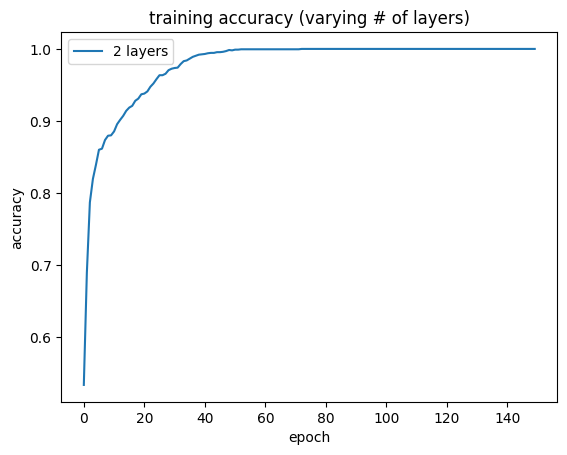

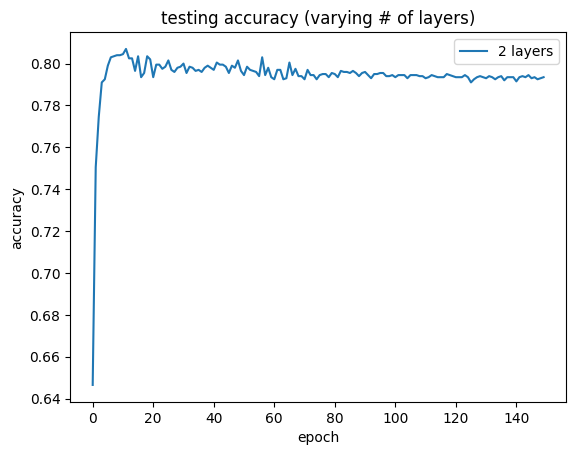

Time to train, eval model: 45.61577272415161 seconds


In [ ]:
start_time = time.time()

# train neural networks
print('\n2 layers:')
nn2_train_accuracy, nn2_test_accuracy = experiment(NN2(input_size=512, hidden_size=100))

# plot training accuracy
plt.plot(nn2_train_accuracy)
plt.title('training accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['2 layers'])
plt.show()

# plot testing accuracy
plt.plot(nn2_test_accuracy)
plt.title('testing accuracy (varying # of layers)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['2 layers'])
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time to train, eval model: {elapsed_time} seconds")

### <font color="red">  TO DO: Impelementation

- Implement and test fully connected networks with 1,2,3, and 4 layers. The starter code above already provides you with an implementation of 2 layers. Each hidden layer should have 100 nodes.
-  On the four layer network, modify the code to replace the ReLU activation function with the sigmoid activation function.
- On the four layer network, modify your code to insert a dropout layer with probability 0.5 after each hidden leayer. Tip: see the function nn.dropout().


In [ ]:
### YOUR CODE HERE
class NN1(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 2)  # 1 fully connected layer.
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.log_softmax(x)  # Apply Log Softmax
        return x

class NN3(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 2)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.log_softmax(x)
        return x

class NN4_sig_drop(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer.
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Second fully connected layer
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2) # Define the fourth fc layer, outputting two classes
        self.dropout = nn.Dropout(0.5) # Define the dropout layer with a prob of 0.5
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.dropout(F.sigmoid(self.fc1(x)))  # Apply sigmoid activation function after the first layer and dropout
        x = self.dropout(F.sigmoid(self.fc2(x)))
        x = self.dropout(F.sigmoid(self.fc3(x)))
        x = self.fc4(x) # Pass the result to the fourth layer
        x = self.log_softmax(x)  # Apply Log Softmax to the output
        return x


## Question 2.1 Architecture Comparison (20 points)

Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 4 curves that show the training accuracy for 1, 2, 3, and 4 layers. The second plot should include 4 curves that show the testing accuracy for 1, 2, 3, and 4 layers. Use ReLU activation functions without any dropout and 100 nodes per hidden layer. Discuss the results.

In [ ]:
### YOUR CODE HERE
class NN4_relu_nodrop(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer.
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Second fully connected layer
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2) # Define the fourth fc layer, outputting two classes
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation function after the first layer.
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # Pass the result to the fourth layer
        x = self.log_softmax(x)  # Apply Log Softmax to the output
        return x


1 layer:
Epoch #10: 	 train accuracy 0.798	 train loss 0.503	 test accuracy 0.751	 test loss 0.546
Epoch #20: 	 train accuracy 0.854	 train loss 0.420	 test accuracy 0.790	 test loss 0.490
Epoch #30: 	 train accuracy 0.867	 train loss 0.375	 test accuracy 0.795	 test loss 0.466
Epoch #40: 	 train accuracy 0.879	 train loss 0.345	 test accuracy 0.803	 test loss 0.457
Epoch #50: 	 train accuracy 0.884	 train loss 0.323	 test accuracy 0.807	 test loss 0.447
Epoch #60: 	 train accuracy 0.887	 train loss 0.307	 test accuracy 0.806	 test loss 0.445
Epoch #70: 	 train accuracy 0.889	 train loss 0.294	 test accuracy 0.802	 test loss 0.445
Epoch #80: 	 train accuracy 0.893	 train loss 0.283	 test accuracy 0.800	 test loss 0.447
Epoch #90: 	 train accuracy 0.900	 train loss 0.273	 test accuracy 0.797	 test loss 0.449
Epoch #100: 	 train accuracy 0.906	 train loss 0.265	 test accuracy 0.797	 test loss 0.451
Epoch #110: 	 train accuracy 0.907	 train loss 0.258	 test accuracy 0.796	 test loss 0.45

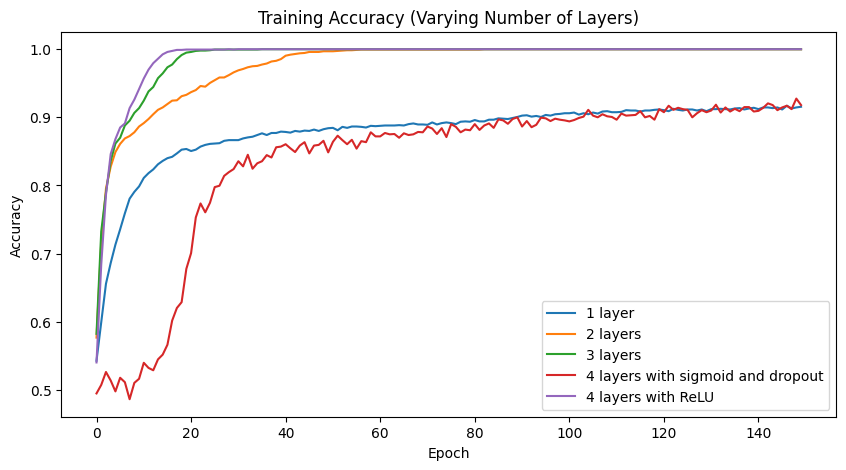

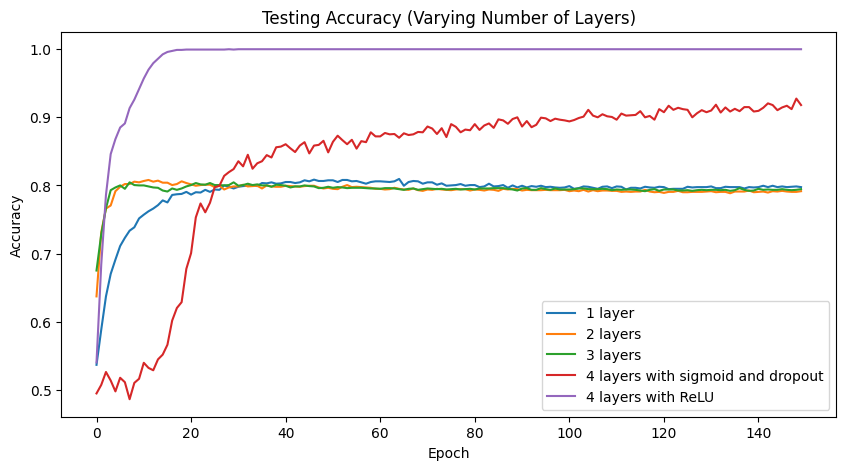

Time to train and evaluate models: 231.03 seconds


In [ ]:
start_time = time.time()

# Train and evaluate all models
print('\n1 layer:')
nn1_train_accuracy, nn1_test_accuracy = experiment(NN1(input_size=512))
print('\n2 layers:')
nn2_train_accuracy, nn2_test_accuracy = experiment(NN2(input_size=512, hidden_size=100))
print('\n3 layers:')
nn3_train_accuracy, nn3_test_accuracy = experiment(NN3(input_size=512, hidden_size=100))
print('\n4 layers with sigmoid and dropout:')
nn4sd_train_accuracy, nn4sd_test_accuracy = experiment(NN4_sig_drop(input_size=512, hidden_size=100))
print('\n4 layers with ReLU:')
nn4r_train_accuracy, nn4r_test_accuracy = experiment(NN4_relu_nodrop(input_size=512, hidden_size=100))

# Plot training accuracies
plt.figure(figsize=(10, 5))
plt.plot(nn1_train_accuracy, label='1 layer')
plt.plot(nn2_train_accuracy, label='2 layers')
plt.plot(nn3_train_accuracy, label='3 layers')
plt.plot(nn4sd_train_accuracy, label='4 layers with sigmoid and dropout')
plt.plot(nn4r_train_accuracy, label='4 layers with ReLU')
plt.title('Training Accuracy (Varying Number of Layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(nn1_test_accuracy, label='1 layer')
plt.plot(nn2_test_accuracy, label='2 layers')
plt.plot(nn3_test_accuracy, label='3 layers')
plt.plot(nn4sd_train_accuracy, label='4 layers with sigmoid and dropout')
plt.plot(nn4r_train_accuracy, label='4 layers with ReLU')
plt.title('Testing Accuracy (Varying Number of Layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time to train and evaluate models: {elapsed_time:.2f} seconds")


#### <font color="red">Analysis and discussion here (< 5 sentences) :</font>
The results suggest that the 4-layer neural network with ReLU activation functions and without dropout performs best, achieving the best balance between capturing complex data patterns and maintaining robustness against overfitting. Additionally, the findings suggest that generally, the more layers a network has, the faster and better it learns features from the training set; however, this does not necessarily indicate better testing capabilities. Specifically, while 2 and 3 layer networks learn quickly, they performs poorly on testing, which may be signs of overfitting; compared to neural networks with 2, 3, or 4 layers, the feature learning ability of the 1-layer network is significantly diminished, indicating the under-fitting problem. Furthermore, while the 4 layer NN with dropout and sigmoid fails to surpass the four-layer network with ReLU activation (which is most likely because the dropout rate = 0.5 is too high); compare to 1, 2, 3 leayer network, it performs better in testing, which indicates that as the structure of the model becomes more complex (the number of layers increases, and the dropout method applies), the model can learn data patterns more effectively, avoid under-fitting problems, and has better generalization ability. Overall, 4 layer NN with ReLU and no dropout performs better than other simpler structure metworks, while the dropout rate = 0.5 might be too high.

## Question 2.2 Activation functions (20 points)

 Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 2 curves that show the training accuracy when using the ReLU versus sigmoid activation functions. The second plot should include 2 curves that show the testing accuracy when using the ReLU versus sigmoid activation functions. Use 2 layers and 100 nodes per hidden layer without any dropout. Discuss the results.

In [ ]:
### YOUR CODE HERE
class NN2_sig(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))  # Apply sigmoid activation function after the first layer.
        x = self.fc2(x)
        x = self.log_softmax(x)
        return x


2 layers with ReLU:
Epoch #10: 	 train accuracy 0.883	 train loss 0.318	 test accuracy 0.799	 test loss 0.452
Epoch #20: 	 train accuracy 0.928	 train loss 0.209	 test accuracy 0.801	 test loss 0.486
Epoch #30: 	 train accuracy 0.964	 train loss 0.140	 test accuracy 0.794	 test loss 0.527
Epoch #40: 	 train accuracy 0.988	 train loss 0.090	 test accuracy 0.798	 test loss 0.596
Epoch #50: 	 train accuracy 0.997	 train loss 0.056	 test accuracy 0.798	 test loss 0.680
Epoch #60: 	 train accuracy 1.000	 train loss 0.034	 test accuracy 0.799	 test loss 0.750
Epoch #70: 	 train accuracy 1.000	 train loss 0.019	 test accuracy 0.798	 test loss 0.839
Epoch #80: 	 train accuracy 1.000	 train loss 0.011	 test accuracy 0.797	 test loss 0.947
Epoch #90: 	 train accuracy 1.000	 train loss 0.006	 test accuracy 0.794	 test loss 1.063
Epoch #100: 	 train accuracy 1.000	 train loss 0.003	 test accuracy 0.795	 test loss 1.141
Epoch #110: 	 train accuracy 1.000	 train loss 0.002	 test accuracy 0.795	 tes

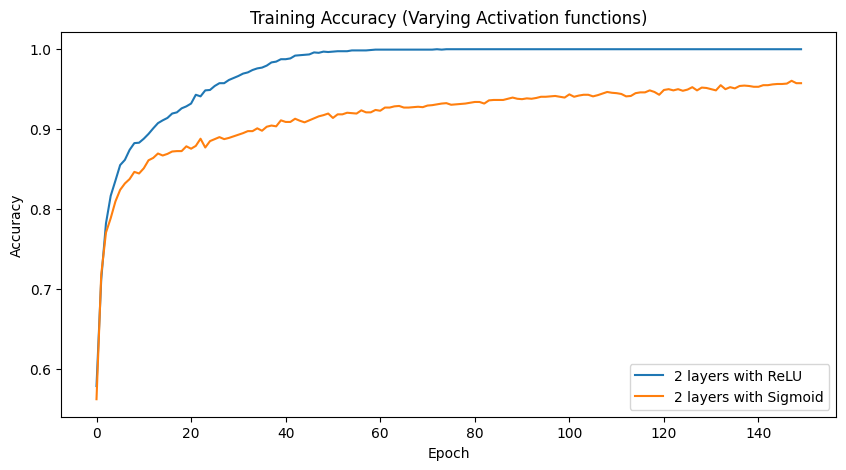

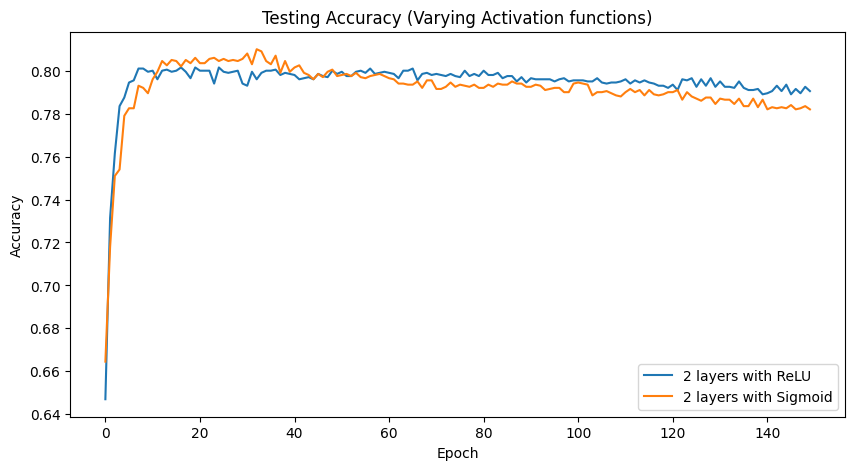

Time to train and evaluate models: 83.72 seconds


In [ ]:
start_time = time.time()

# Train and evaluate all models
print('\n2 layers with ReLU:')
nn2r_train_accuracy, nn2r_test_accuracy = experiment(NN2(input_size=512, hidden_size=100))
print('\n2 layers with Sigmoid:')
nn2s_train_accuracy, nn2s_test_accuracy = experiment(NN2_sig(input_size=512, hidden_size=100))

# Plot training accuracies
plt.figure(figsize=(10, 5))
plt.plot(nn2r_train_accuracy, label='2 layers with ReLU')
plt.plot(nn2s_train_accuracy, label='2 layers with Sigmoid')
plt.title('Training Accuracy (Varying Activation functions)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(nn2r_test_accuracy, label='2 layers with ReLU')
plt.plot(nn2s_test_accuracy, label='2 layers with Sigmoid')
plt.title('Testing Accuracy (Varying Activation functions)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time to train and evaluate models: {elapsed_time:.2f} seconds")


#### <font color="red">Analysis and discussion here (< 5 sentences) :</font>
The result indicate that the network with ReLU activation function performs better in both learning speed and classification effectiveness. The network with ReLU leads to faster learning and higher overall training accuracy, outperforming the sigmoid function. Besides, its testing accuracy also reflects better generalization, with a relavently consistently higher score and less overfitting compared to the sigmoid. ReLU's higher computational efficiency and its ability to mitigate the vanishing gradient problem (a problem usually encountered by sigmoid functions in deep networks) may be the reason for these experimental results.


## Question 2.3 Dropout comparison (15 points)

Generate two plots where the y-axis is the accuracy and the x-axis is the # of epochs. The first plot should include 2 curves that show the training accuracy with and without dropout (with probability 0.5) after each hidden layer. The second plot should include 2 curves that show the testing accuracy with and without dropout (with probability 0.5) after each hidden layer. Use 4 layers and 36 nodes per hidden layer with ReLU activation functions. Discuss the results.

In [ ]:
### YOUR CODE HERE
class NN4_relu_drop(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.dropout = nn.Dropout(0.5) # Define the dropout layer with a prob of 0.5
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.fc4(x)
        x = self.log_softmax(x)
        return x


4 layers with ReLU and dropout:
Epoch #10: 	 train accuracy 0.605	 train loss 0.669	 test accuracy 0.681	 test loss 0.662
Epoch #20: 	 train accuracy 0.804	 train loss 0.506	 test accuracy 0.777	 test loss 0.520
Epoch #30: 	 train accuracy 0.875	 train loss 0.334	 test accuracy 0.798	 test loss 0.453
Epoch #40: 	 train accuracy 0.921	 train loss 0.221	 test accuracy 0.802	 test loss 0.482
Epoch #50: 	 train accuracy 0.948	 train loss 0.156	 test accuracy 0.798	 test loss 0.562
Epoch #60: 	 train accuracy 0.960	 train loss 0.124	 test accuracy 0.803	 test loss 0.670
Epoch #70: 	 train accuracy 0.971	 train loss 0.081	 test accuracy 0.798	 test loss 0.806
Epoch #80: 	 train accuracy 0.982	 train loss 0.069	 test accuracy 0.801	 test loss 0.899
Epoch #90: 	 train accuracy 0.984	 train loss 0.054	 test accuracy 0.801	 test loss 0.981
Epoch #100: 	 train accuracy 0.984	 train loss 0.050	 test accuracy 0.799	 test loss 1.129
Epoch #110: 	 train accuracy 0.988	 train loss 0.042	 test accurac

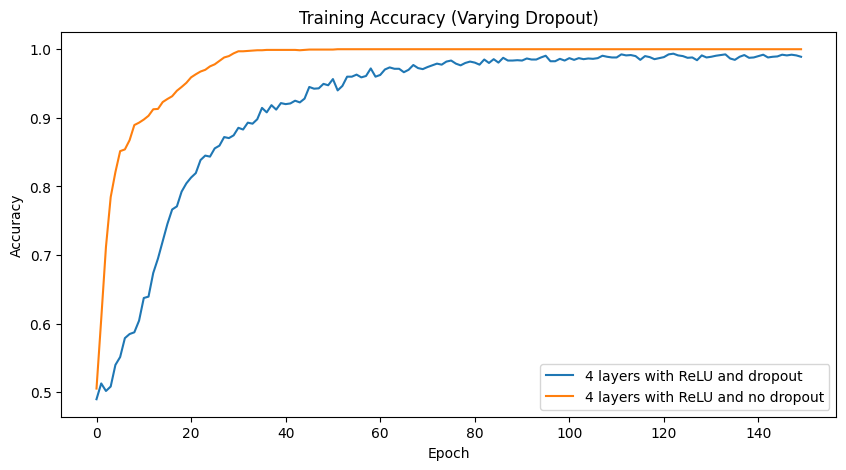

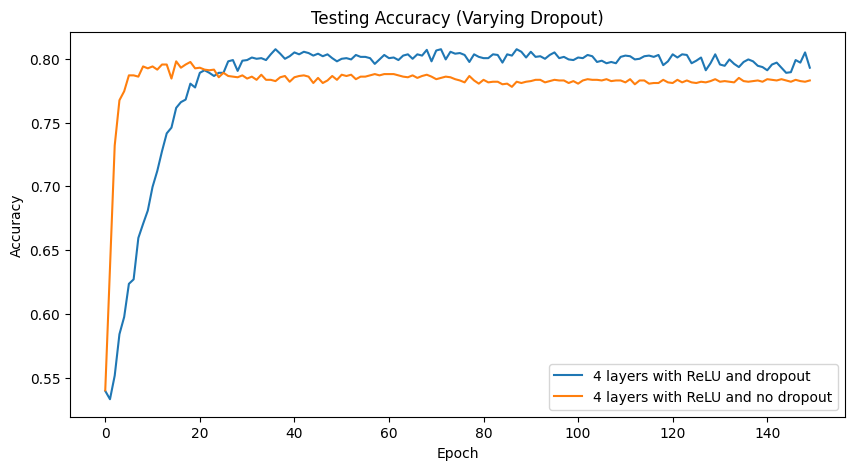

Time to train and evaluate models: 100.41 seconds


In [ ]:
start_time = time.time()

# Train and evaluate all models
print('\n4 layers with ReLU and dropout:')
nn4rd36_train_accuracy, nn4rd36_test_accuracy = experiment(NN4_relu_drop(input_size=512, hidden_size=36))
print('\n4 layers with ReLU and no dropout:')
nn4r36_train_accuracy, nn4r36_test_accuracy = experiment(NN4_relu_nodrop(input_size=512, hidden_size=36))

# Plot training accuracies
plt.figure(figsize=(10, 5))
plt.plot(nn4rd36_train_accuracy, label='4 layers with ReLU and dropout')
plt.plot(nn4r36_train_accuracy, label='4 layers with ReLU and no dropout')
plt.title('Training Accuracy (Varying Dropout)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(nn4rd36_test_accuracy, label='4 layers with ReLU and dropout')
plt.plot(nn4r36_test_accuracy, label='4 layers with ReLU and no dropout')
plt.title('Testing Accuracy (Varying Dropout)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time to train and evaluate models: {elapsed_time:.2f} seconds")


#### <font color="red">Analysis and discussion here (< 5 sentences) :</font>
The results show that the network with dropout has lower training accuracy but better test accuracy, which means that dropout can make the network generalize better to unseen data and avoid overfitting problem. In contrast, while the network without dropout learns faster (because all neurons participate in training, allowing the network to use all available resources to adjust weights and adapt to the training data faster), its high training accuracy and low testing accuracy suggests overfitting. In conclusion, as a regularization methed, dropout effectively enhances the model's generalizeation and rubustness ability by preventing the network from relying too heavily on any individual neuron.

## Question 2.4  (5 points)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Pick all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.



#### <font color="red">Answer here </font>:
Both 1 and 3.

Train on a larger dataset.

Increase the regularization strength.


#### <font color="red">Explanation (< 5 sentences) here: </font>:

Training the model on a larger dataset can help the model generalize better to new, unseen data, because it provides more examples for the model to learn from, reducing the likelihood of overfitting caused by small datasets with less feature.

Increasing the model's regularization strength can help the model avoid overfitting problem. Now we has already applied dropout to the model, and we can further implement L1/L2 regularization or early stopping method to penalize overly complex models.

In contrast, although adding more hidden units indeed can increase the model's capacity and make the model learn more complex patterns, it may also lead to more severe overfitting problems as the model learns better on the training data.





# Part 3: Exploration  (20 points)

## Question 3.1 Explore  (20 points)

There are other aspects to optimizing neural network performance. Explore two here, and discuss your findings. You may also try different neural architures here, other than feedforward networks.

Dynamic learning rate & L2 regularization:

In [ ]:
### YOUR CODE HERE
from torch.optim.lr_scheduler import StepLR

def experiment_2(model, uplr = None, l2 = None):
  # negative log likelihood loss function
  loss_fn = nn.NLLLoss()
  if l2:
    # Adam optimizer with L2 regularization (weight_decay)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)
  else:
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

  # Learning rate scheduler
  if uplr:
    scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

  average_train_loss = []
  all_train_accuracy = []
  average_test_loss = []
  all_test_accuracy = []

  for epoch in range(150):
    train_accuracy, train_loss = train_epoch(train_loader, model, loss_fn, optimizer)
    all_train_accuracy += [train_accuracy]
    test_accuracy, test_loss = eval_epoch(test_loader, model, loss_fn, optimizer)
    all_test_accuracy += [test_accuracy]

    if uplr:
      # Update learning rate
      scheduler.step()
    if epoch % 10 == 9:
      print(f'Epoch #{epoch+1}: \t train accuracy {train_accuracy:.3f}\t train loss {train_loss:.3f}\t test accuracy {test_accuracy:.3f}\t test loss {test_loss:.3f}')

  return all_train_accuracy, all_test_accuracy


4 layers with ReLU, dropout and StepLR:
Epoch #10: 	 train accuracy 0.584	 train loss 0.679	 test accuracy 0.656	 test loss 0.672
Epoch #20: 	 train accuracy 0.814	 train loss 0.456	 test accuracy 0.787	 test loss 0.480
Epoch #30: 	 train accuracy 0.882	 train loss 0.337	 test accuracy 0.796	 test loss 0.451
Epoch #40: 	 train accuracy 0.907	 train loss 0.255	 test accuracy 0.801	 test loss 0.480
Epoch #50: 	 train accuracy 0.942	 train loss 0.177	 test accuracy 0.801	 test loss 0.524
Epoch #60: 	 train accuracy 0.950	 train loss 0.167	 test accuracy 0.800	 test loss 0.523
Epoch #70: 	 train accuracy 0.954	 train loss 0.159	 test accuracy 0.800	 test loss 0.534
Epoch #80: 	 train accuracy 0.955	 train loss 0.153	 test accuracy 0.799	 test loss 0.538
Epoch #90: 	 train accuracy 0.964	 train loss 0.145	 test accuracy 0.800	 test loss 0.543
Epoch #100: 	 train accuracy 0.958	 train loss 0.153	 test accuracy 0.797	 test loss 0.552
Epoch #110: 	 train accuracy 0.961	 train loss 0.146	 test

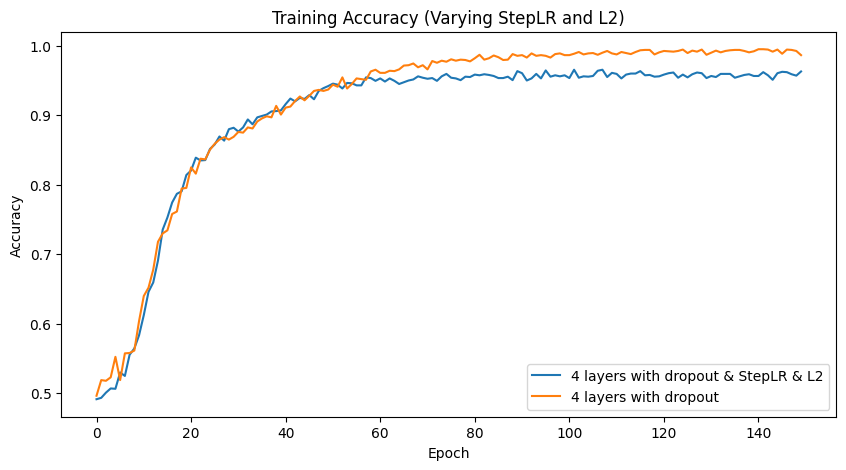

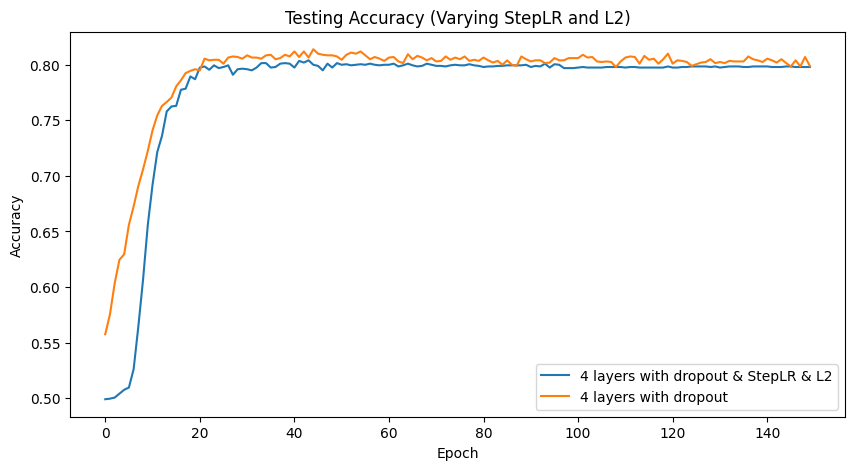

Time to train and evaluate models: 135.89 seconds


In [ ]:
start_time = time.time()

# Train and evaluate all models
print('\n4 layers with ReLU, dropout and StepLR:')
nn4rd36s_train_accuracy, nn4rd36s_test_accuracy = experiment_2(NN4_relu_drop(input_size=512, hidden_size=36), uplr = True, l2 = True)
print('\n4 layers with ReLU and dropout:')
nn4rd36ns_train_accuracy, nn4rd36ns_test_accuracy = experiment_2(NN4_relu_drop(input_size=512, hidden_size=36))

# Plot training accuracies
plt.figure(figsize=(10, 5))
plt.plot(nn4rd36s_train_accuracy, label='4 layers with dropout & StepLR & L2')
plt.plot(nn4rd36ns_train_accuracy, label='4 layers with dropout')
plt.title('Training Accuracy (Varying StepLR and L2)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(nn4rd36s_test_accuracy, label='4 layers with dropout & StepLR & L2')
plt.plot(nn4rd36ns_test_accuracy, label='4 layers with dropout')
plt.title('Testing Accuracy (Varying StepLR and L2)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time to train and evaluate models: {elapsed_time:.2f} seconds")


Activation function comparison (implemented with dropout & Dynamic learning rate & L2 regularization ):

sigmoid v.s. LeakyReLU v.s. Parametric ReLU (PReLU) v.s. Exponential Linear Unit (ELU) v.s. Tanh v.s. Swish

Also, I change the dropout rate to 0.2 according the result and discussion from question 2.1, and the consideration that the addition of L2 regularization has already improve the regularization strength.

In [ ]:
class NN4_sig_drop2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.dropout = nn.Dropout(0.2)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.dropout(F.sigmoid(self.fc1(x)))
        x = self.dropout(F.sigmoid(self.fc2(x)))
        x = self.dropout(F.sigmoid(self.fc3(x)))
        x = self.fc4(x)
        x = self.log_softmax(x)
        return x

class NN4_LReLU_drop(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.dropout = nn.Dropout(0.2)
        self.log_softmax = nn.LogSoftmax(dim=1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)  # LeakyReLU activation

    def forward(self, x):
        x = self.dropout(F.leaky_relu(self.fc1(x)))
        x = self.dropout(F.leaky_relu(self.fc2(x)))
        x = self.dropout(F.leaky_relu(self.fc3(x)))
        x = self.fc4(x)
        x = self.log_softmax(x)
        return x

class NN4_PReLU_drop(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.dropout = nn.Dropout(0.2)
        self.log_softmax = nn.LogSoftmax(dim=1)
        self.prelu = nn.PReLU()  # Parametric ReLU activation

    def forward(self, x):
        x = self.dropout(self.prelu(self.fc1(x)))
        x = self.dropout(self.prelu(self.fc2(x)))
        x = self.dropout(self.prelu(self.fc3(x)))
        x = self.fc4(x)
        x = self.log_softmax(x)
        return x

class NN4_ELU_drop(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.dropout = nn.Dropout(0.2)
        self.log_softmax = nn.LogSoftmax(dim=1)
        self.elu = nn.ELU(alpha=1.0)  # ELU activation

    def forward(self, x):
        x = self.dropout(self.elu(self.fc1(x)))
        x = self.dropout(self.elu(self.fc2(x)))
        x = self.dropout(self.elu(self.fc3(x)))
        x = self.fc4(x)
        x = self.log_softmax(x)
        return x

class NN4_Tanh_drop(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.dropout = nn.Dropout(0.2)
        self.log_softmax = nn.LogSoftmax(dim=1)
        self.tanh = nn.Tanh()  # Tanh activation

    def forward(self, x):
        x = self.dropout(self.tanh(self.fc1(x)))
        x = self.dropout(self.tanh(self.fc2(x)))
        x = self.dropout(self.tanh(self.fc3(x)))
        x = self.fc4(x)
        x = self.log_softmax(x)
        return x

# Custom Swish Activation Function
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class NN4_Swish_drop(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)
        self.dropout = nn.Dropout(0.2)
        self.log_softmax = nn.LogSoftmax(dim=1)
        self.swish = Swish()  # Swish activation

    def forward(self, x):
        x = self.dropout(self.swish(self.fc1(x)))
        x = self.dropout(self.swish(self.fc2(x)))
        x = self.dropout(self.swish(self.fc3(x)))
        x = self.fc4(x)
        x = self.log_softmax(x)
        return x


4 layers with sigmoid:
Epoch #10: 	 train accuracy 0.540	 train loss 0.690	 test accuracy 0.717	 test loss 0.686
Epoch #20: 	 train accuracy 0.793	 train loss 0.564	 test accuracy 0.786	 test loss 0.569
Epoch #30: 	 train accuracy 0.848	 train loss 0.367	 test accuracy 0.807	 test loss 0.439
Epoch #40: 	 train accuracy 0.868	 train loss 0.319	 test accuracy 0.809	 test loss 0.434
Epoch #50: 	 train accuracy 0.893	 train loss 0.282	 test accuracy 0.812	 test loss 0.448
Epoch #60: 	 train accuracy 0.880	 train loss 0.288	 test accuracy 0.812	 test loss 0.441
Epoch #70: 	 train accuracy 0.889	 train loss 0.284	 test accuracy 0.813	 test loss 0.443
Epoch #80: 	 train accuracy 0.893	 train loss 0.287	 test accuracy 0.812	 test loss 0.445
Epoch #90: 	 train accuracy 0.894	 train loss 0.280	 test accuracy 0.812	 test loss 0.446
Epoch #100: 	 train accuracy 0.890	 train loss 0.281	 test accuracy 0.812	 test loss 0.447
Epoch #110: 	 train accuracy 0.894	 train loss 0.277	 test accuracy 0.812	 

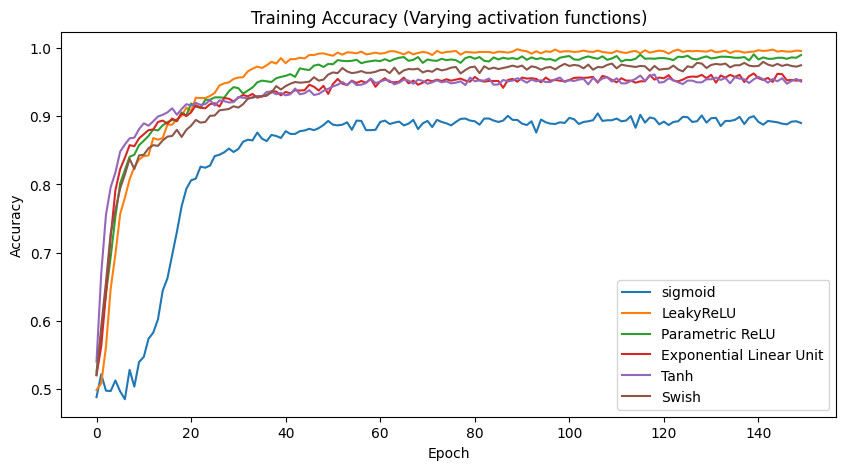

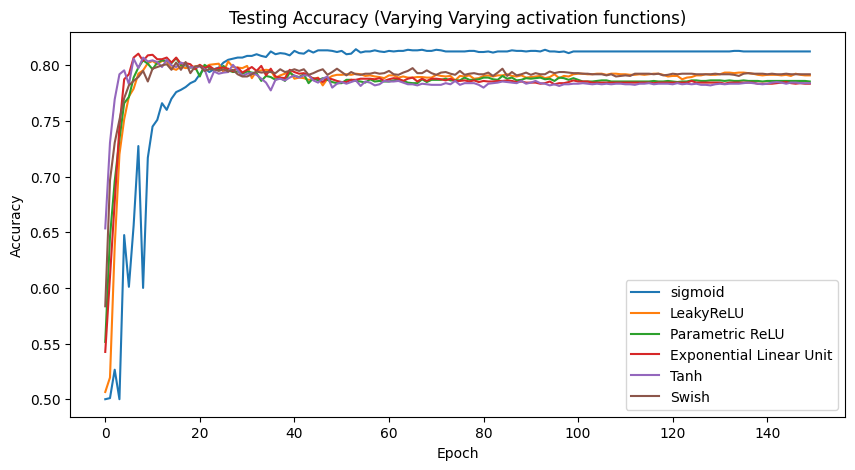

Time to train and evaluate models: 363.85 seconds


In [ ]:
start_time = time.time()

# Train and evaluate all models
print('\n4 layers with sigmoid:')
sig_train_accuracy, sig_test_accuracy = experiment_2(NN4_sig_drop2(input_size=512, hidden_size=36), uplr = True)
print('\n4 layers with LeakyReLU:')
LReLU_train_accuracy, LReLU_test_accuracy = experiment_2(NN4_LReLU_drop(input_size=512, hidden_size=36), uplr = True)
print('\n4 layers with Parametric ReLU:')
PReLU_train_accuracy, PReLU_test_accuracy = experiment_2(NN4_PReLU_drop(input_size=512, hidden_size=36), uplr = True)
print('\n4 layers with Exponential Linear Unit:')
ELU_train_accuracy, ELU_test_accuracy = experiment_2(NN4_ELU_drop(input_size=512, hidden_size=36), uplr = True)
print('\n4 layers with Tanh:')
Tanh_train_accuracy, Tanh_test_accuracy = experiment_2(NN4_Tanh_drop(input_size=512, hidden_size=36), uplr = True)
print('\n4 layers with Swish:')
Swish_train_accuracy, Swish_test_accuracy = experiment_2(NN4_Swish_drop(input_size=512, hidden_size=36), uplr = True)

# Plot training accuracies
plt.figure(figsize=(10, 5))
plt.plot(sig_train_accuracy, label='sigmoid')
plt.plot(LReLU_train_accuracy, label='LeakyReLU')
plt.plot(PReLU_train_accuracy, label='Parametric ReLU')
plt.plot(ELU_train_accuracy, label='Exponential Linear Unit')
plt.plot(Tanh_train_accuracy, label='Tanh')
plt.plot(Swish_train_accuracy, label='Swish')
plt.title('Training Accuracy (Varying activation functions)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot testing accuracies
plt.figure(figsize=(10, 5))
plt.plot(sig_test_accuracy, label='sigmoid')
plt.plot(LReLU_test_accuracy, label='LeakyReLU')
plt.plot(PReLU_test_accuracy, label='Parametric ReLU')
plt.plot(ELU_test_accuracy, label='Exponential Linear Unit')
plt.plot(Tanh_test_accuracy, label='Tanh')
plt.plot(Swish_test_accuracy, label='Swish')
plt.title('Testing Accuracy (Varying Varying activation functions)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time to train and evaluate models: {elapsed_time:.2f} seconds")

#### <font color="red">Analysis and discussion here (< 15 sentences) :</font>
To optimize neural network performance, I explored the dynamic learning rate with L2 regularization strength and further compared several activation functions including LeakyReLU, Parametric ReLU (PReLU), Exponential Linear Unit (ELU), Tanh and Swish with lower dropout rate.

From the result of dynamic learning rate & L2 regularization, we can find that adding StepLR and L2 regularization to the four-layer fully connected neural network does not significantly enhance test accuracy but contributes to excellent model stability. The model with the implementation of dynamic learning rate & L2 regularization shows robust generalization without overfitting due to the fact that StepLR can help fine-tune the learning rate, thus preventing drastic weight update, and L2 regularization penalizes large weights, preventing them from becoming too large. This approach can effectively improve the model's reliability and consistency.

From the result of further activation functions comparison with a decrease in dropout rate, we can find that the overall performance improved and the sigmoid perform better than Tanh, other activation functions on the given dataset, suggesting it is more suited to this particular task. Besides, the performances on training and testing for Sigmoid suggest that it learns more slowly and requires more epochs to reach its full potential than other activation functions, while it avoided overfitting and performed better during testing. All other activation functions show a rapid increase in accuracy during the initial epochs. In addition, none of these models exhibit obvious overfitting problems, which shows that these models with different activation functions can generalize well. Meanwhile, the model's testing performance improved, which suggests that the previous dropout rate is unnecessarily too high, impeding the model's learning of data patterns.

* Note that the decision of decrease the dropout rate is due to the result and discussion from question 2.1, and the consideration that the addition of L2 regularization has already improve the regularization strength.


----------------------------
# <font color="blue"> Submission Instructions</font>
---------------------------

1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of all cells).
2. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
3. Once you've rerun everything, select File -> Download as -> PDF via LaTeX (If you have trouble using "PDF via LaTex", you can also save the webpage as pdf. <font color='blue'> Make sure all your solutions  are displayed in the pdf</font>, it's okay if the provided codes get cut off because lines are not wrapped in code cells).
4. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing your graders will see!
5. Submit your PDF on Gradescope.
